Elijo 3 kpis:
* El precio historico de la criptomoneda
* El rsi
* La media movil

In [19]:
import pandas as pd
import datetime as dt
import time as t
import plotly.graph_objects as go

In [20]:
import requests
base_url = "https://api.coingecko.com/api/v3"

In [21]:
def get_price_history(coin_id, start_date, end_date):
    endpoint = f"/coins/{coin_id}/market_chart/range"
    params = {
        "vs_currency": "usd",  # Cambia a la moneda que desees
        "from": start_date,
        "to": end_date}
    url = base_url + endpoint
    response = requests.get(url, params=params)
    data = response.json()
    prices = data.get("prices", [])
    df = pd.DataFrame(prices, columns=["FECHAS", "usd"])
    df["FECHAS"] = pd.to_datetime(df["FECHAS"], unit="ms")
    df["COIN_ID"] = coin_id
    return df

In [22]:
### tengo que poner la fecha en UNIX porque sino no me da error. 
## BITCOIN
coin_id = "bitcoin"  # Reemplaza con el ID de la moneda que deseas analizar
start_date = "1577890800"  # Fecha de inicio enero 2020
end_date = "1692543600"    # 20 Agosto 2023

price_history_bitcoin = get_price_history(coin_id, start_date, end_date)

price_history_bitcoin

,FECHAS,usd,COIN_ID
0,2020-01-02,7193.754668,bitcoin
1,2020-01-03,6963.853354,bitcoin
2,2020-01-04,7300.346935,bitcoin
3,2020-01-05,7351.377053,bitcoin
4,2020-01-06,7349.972248,bitcoin
...,...,...,...
1322,2023-08-16,29170.490397,bitcoin
1323,2023-08-17,28754.197021,bitcoin
1324,2023-08-18,26501.587270,bitcoin
1325,2023-08-19,26042.838257,bitcoin


In [23]:
price_history_bitcoin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1327 entries, 0 to 1326
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   FECHAS   1327 non-null   datetime64[ns]
 1   usd      1327 non-null   float64       
 2   COIN_ID  1327 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 31.2+ KB


In [24]:
price_history_bitcoin.drop(columns=['COIN_ID'], inplace=True)

In [25]:
price_history_bitcoin

,FECHAS,usd
0,2020-01-02,7193.754668
1,2020-01-03,6963.853354
2,2020-01-04,7300.346935
3,2020-01-05,7351.377053
4,2020-01-06,7349.972248
...,...,...
1322,2023-08-16,29170.490397
1323,2023-08-17,28754.197021
1324,2023-08-18,26501.587270
1325,2023-08-19,26042.838257


In [28]:
price_history_bitcoin


,FECHAS,usd
0,2020-01-02,7193.754668
1,2020-01-03,6963.853354
2,2020-01-04,7300.346935
3,2020-01-05,7351.377053
4,2020-01-06,7349.972248
...,...,...
1322,2023-08-16,29170.490397
1323,2023-08-17,28754.197021
1324,2023-08-18,26501.587270
1325,2023-08-19,26042.838257


In [31]:
from ta.momentum import RSIIndicator

# Calcular RSI
rsi_period = 14  # Período típico para RSI
indicator = RSIIndicator(price_history_bitcoin['usd'], window=rsi_period)
price_history_bitcoin['RSI'] = indicator.rsi()

price_history_bitcoin.tail()

,FECHAS,usd,RSI
1322,2023-08-16,29170.490397,44.707455
1323,2023-08-17,28754.197021,38.069454
1324,2023-08-18,26501.587270,20.410125
1325,2023-08-19,26042.838257,18.525435
1326,2023-08-20,26104.778631,19.604897


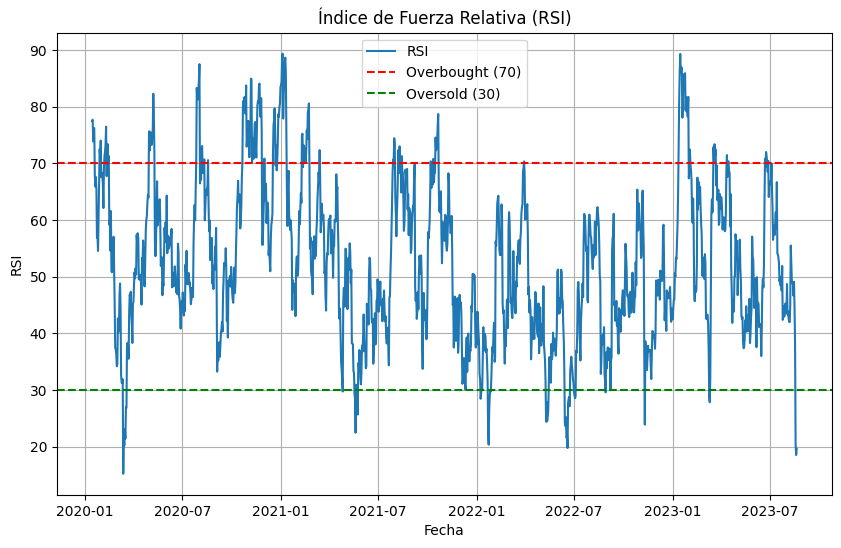

In [34]:
import matplotlib.pyplot as plt

# Graficar el RSI
plt.figure(figsize=(10, 6))
plt.plot(price_history_bitcoin['FECHAS'], price_history_bitcoin['RSI'], label='RSI')
plt.axhline(y=70, color='r', linestyle='--', label='Overbought (70)')
plt.axhline(y=30, color='g', linestyle='--', label='Oversold (30)')
plt.title('Índice de Fuerza Relativa (RSI)')
plt.xlabel('Fecha')
plt.ylabel('RSI')
plt.legend()
plt.grid(True)
plt.show()

Sí, el Índice de Fuerza Relativa (RSI) se considera un indicador clave de rendimiento (KPI) en el análisis técnico de los mercados financieros, incluyendo el mercado de criptomonedas. El RSI es un indicador que mide la velocidad y magnitud de los cambios en los precios y se utiliza para evaluar la fuerza y la dirección de una tendencia, así como para identificar condiciones de sobrecompra y sobreventa en un activo.

Como KPI, el RSI puede proporcionar información valiosa a los operadores e inversores sobre el posible agotamiento de una tendencia alcista o bajista y la probabilidad de una inversión en la dirección del precio. Los valores del RSI oscilan entre 0 y 100, donde tradicionalmente se considera que valores por encima de 70 indican sobrecompra y valores por debajo de 30 indican sobreventa.

Algunos usos del RSI como KPI incluyen:

Identificación de Tendencias: Los valores extremos del RSI pueden ayudar a identificar cuándo una criptomoneda está sobrecomprada (posiblemente debido a una tendencia alcista excesiva) o sobrevendida (posiblemente debido a una tendencia bajista excesiva).

Divergencias: Las divergencias entre el RSI y el movimiento de los precios pueden indicar posibles cambios en la dirección de la tendencia, lo que podría ser una señal para los operadores.

Confirmación de Señales: El RSI se utiliza a menudo junto con otros indicadores técnicos para confirmar señales de compra o venta generadas por otros métodos de análisis.

Establecimiento de Stop-Loss: Los operadores pueden utilizar los niveles de sobrecompra y sobreventa del RSI para establecer niveles de stop-loss y take-profit.

Análisis Comparativo: Comparar el RSI de diferentes criptomonedas o activos puede proporcionar información sobre la fuerza relativa de cada uno en relación con su tendencia de precios.

Dado que el RSI es un KPI popular en el análisis técnico, muchos operadores e inversores lo utilizan para tomar decisiones informadas en sus estrategias de inversión y trading. Sin embargo, como con cualquier indicador, es importante considerar múltiples factores y no basar decisiones únicamente en un solo indicador.

In [37]:
# Calcular media móvil de 20 días
rolling_window = 50
price_history_bitcoin['MovingAverage'] = price_history_bitcoin['usd'].rolling(window=rolling_window).mean()

print(price_history_bitcoin.head())

      FECHAS          usd  RSI  MovingAverage
0 2020-01-02  7193.754668  NaN            NaN
1 2020-01-03  6963.853354  NaN            NaN
2 2020-01-04  7300.346935  NaN            NaN
3 2020-01-05  7351.377053  NaN            NaN
4 2020-01-06  7349.972248  NaN            NaN


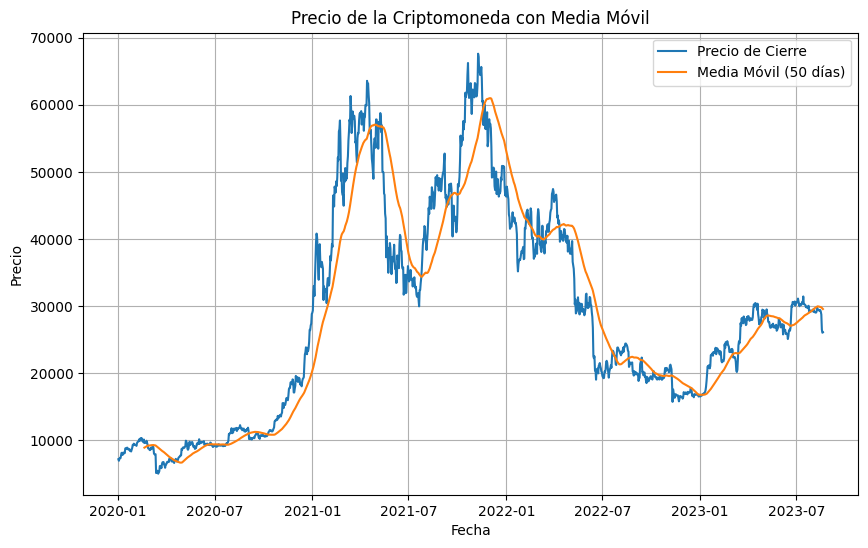

In [38]:
import matplotlib.pyplot as plt

# Graficar los datos y la media móvil
plt.figure(figsize=(10, 6))
plt.plot(price_history_bitcoin['FECHAS'], price_history_bitcoin['usd'], label='Precio de Cierre')
plt.plot(price_history_bitcoin['FECHAS'], price_history_bitcoin['MovingAverage'], label=f'Media Móvil ({rolling_window} días)')
plt.title('Precio de la Criptomoneda con Media Móvil')
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.legend()
plt.grid(True)
plt.show()

La media móvil es considerada un indicador clave de rendimiento (KPI) en el análisis técnico de los mercados financieros, incluyendo el mercado de criptomonedas. La media móvil es una herramienta que ayuda a suavizar los datos de precios a lo largo del tiempo y proporciona una perspectiva más clara de la tendencia subyacente.

La media móvil se calcula promediando los precios de un activo en un período específico y moviendo esta ventana a medida que avanza el tiempo. Puede ser utilizada para:

Identificar Tendencias: Las medias móviles ayudan a suavizar la volatilidad diaria y permiten a los analistas ver la dirección general de la tendencia.

Cruce de Medias Móviles: El cruce de dos medias móviles, como la cruz de una media móvil más corta sobre una más larga, puede ser utilizado como señal de compra o venta.

Soporte y Resistencia Dinámicos: Las medias móviles también pueden actuar como niveles de soporte (en tendencias alcistas) o resistencia (en tendencias bajistas).

Confirmación de Señales: Las medias móviles pueden ser utilizadas para confirmar otras señales de compra o venta generadas por otros indicadores técnicos.

Análisis de Volatilidad: Observar cómo la distancia entre el precio actual y la media móvil varía puede proporcionar información sobre la volatilidad del activo.

Las medias móviles son herramientas versátiles y se pueden personalizar según las preferencias del operador o inversor. Se utilizan ampliamente en el análisis técnico como una forma de entender las tendencias y los patrones en los precios de los activos financieros, incluyendo las criptomonedas.